In [87]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re
import matplotlib.pyplot as plt

In [88]:
train = pd.read_csv(r'C:\Users\Yasaswini\Downloads\kannada_offensive_train.csv')
val = pd.read_csv(r'C:\Users\Yasaswini\Downloads\kannada_offensive_dev.csv')

In [89]:
train.head()

,Tik tok alli jagala madtidralla adra baggenu ondu video madi anna super agi ugididdira Not_offensive
0,Anyone from kerala here\tnot-Kannada
1,Movie rerelease madi plss\tNot_offensive
2,Amazon prime alli bittidira....yella manele no...
3,Guru sure news nanu tik tok dawn lod madeda ya...
4,ಸುದೀಪ್ ಸರ್ ಅಂಡ್ ದರ್ಶನ್ ಸರ್ ಅವರಿಗೆ ಇರೋ ಫ್ಯಾನ್ಸ್...


In [90]:
train.columns

Index(['Tik tok alli jagala madtidralla adra baggenu ondu video madi anna super agi ugididdira\tNot_offensive'], dtype='object')

In [91]:
train.describe()

,Tik tok alli jagala madtidralla adra baggenu ondu video madi anna super agi ugididdira Not_offensive
count,6216
unique,5935
top,ಚಂದನ್ ಶೆಟ್ಟಿ ಟ್ರೊಲ್ ವಿಡಿಯೋ ನೀವು ನೋಡಿ ನೆಗಡ್ಡೆ ಇ...
freq,66


In [92]:
train = pd.read_csv(r'C:\Users\Yasaswini\Downloads\kannada_offensive_train.csv', delimiter='\t', names=['sentence','classes','nan'])
train = train.drop(columns=['nan'])
train.head()

,sentence,classes
0,Tik tok alli jagala madtidralla adra baggenu o...,Not_offensive
1,Anyone from kerala here,not-Kannada
2,Movie rerelease madi plss,Not_offensive
3,Amazon prime alli bittidira....yella manele no...,Not_offensive
4,Guru sure news nanu tik tok dawn lod madeda ya...,Not_offensive


In [93]:
train['classes'].value_counts()

Not_offensive                           3543
not-Kannada                             1521
Offensive_Targeted_Insult_Individual     487
Offensive_Targeted_Insult_Group          329
Offensive_Untargetede                    212
Offensive_Targeted_Insult_Other          123
30                                         1
Name: classes, dtype: int64

In [94]:
i = train[(train.classes=='30')].index
train = train.drop(i)

In [95]:
train['classes'].value_counts()

Not_offensive                           3543
not-Kannada                             1521
Offensive_Targeted_Insult_Individual     487
Offensive_Targeted_Insult_Group          329
Offensive_Untargetede                    212
Offensive_Targeted_Insult_Other          123
Name: classes, dtype: int64

In [96]:
train['sentence'] = train['sentence'].apply(lambda x: x.lower())
train['sentence'] = train['sentence'].apply(lambda x: re.sub(r' +', ' ',x))
max_features = 2000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(train['sentence'].values)
X  = tokenizer.texts_to_sequences(train['sentence'].values)
X = pad_sequences(X)

In [97]:
target_names = train['classes'].unique()
target_dict = {n:i for i, n in enumerate(target_names)}
Y = train['classes'].map(target_dict)
Y = to_categorical(Y)
Y = pd.get_dummies(train['classes']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(4972, 61) (4972, 6)
(1244, 61) (1244, 6)


In [98]:
embed_dim = 100
lstm_out = 128
model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X_train.shape[1] ))
model.add(LSTM(lstm_out,return_sequences=False))
model.add(Dense(6,activation='softmax'))

print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 61, 100)           200000    
_________________________________________________________________
lstm_7 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 774       
Total params: 318,022
Trainable params: 318,022
Non-trainable params: 0
_________________________________________________________________
None


In [99]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

In [100]:
history = model.fit(X_train, Y_train,batch_size = 32, validation_data=(X_test,Y_test), epochs=50, verbose=2)

Train on 4972 samples, validate on 1244 samples
Epoch 1/50
 - 16s - loss: 1.1230 - acc: 0.5907 - val_loss: 0.9545 - val_acc: 0.6656
Epoch 2/50
 - 15s - loss: 0.7826 - acc: 0.7253 - val_loss: 0.8814 - val_acc: 0.6961
Epoch 3/50
 - 16s - loss: 0.6545 - acc: 0.7593 - val_loss: 0.9160 - val_acc: 0.6905
Epoch 4/50
 - 17s - loss: 0.5911 - acc: 0.7852 - val_loss: 0.9415 - val_acc: 0.6801
Epoch 5/50
 - 15s - loss: 0.5256 - acc: 0.8027 - val_loss: 1.0256 - val_acc: 0.6752
Epoch 6/50
 - 16s - loss: 0.4746 - acc: 0.8188 - val_loss: 1.0692 - val_acc: 0.6744
Epoch 7/50
 - 15s - loss: 0.4291 - acc: 0.8345 - val_loss: 1.1620 - val_acc: 0.6760
Epoch 8/50
 - 15s - loss: 0.3883 - acc: 0.8490 - val_loss: 1.2295 - val_acc: 0.6632
Epoch 9/50
 - 14s - loss: 0.3451 - acc: 0.8652 - val_loss: 1.2742 - val_acc: 0.6672
Epoch 10/50
 - 15s - loss: 0.3135 - acc: 0.8737 - val_loss: 1.3232 - val_acc: 0.6495
Epoch 11/50
 - 15s - loss: 0.2846 - acc: 0.8821 - val_loss: 1.4489 - val_acc: 0.6495
Epoch 12/50
 - 15s - loss:

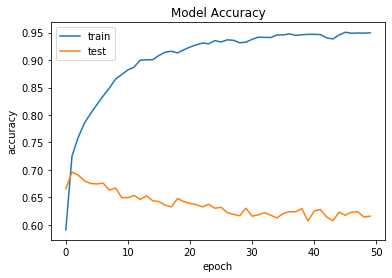

In [101]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc']) 
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'])
#plt.show()
plt.savefig('Model_accuracy.png', dpi=600)

In [102]:
score = model.evaluate(X_test,Y_test,verbose=1)
predictions = model.predict(X_test)

print("Test score is {}".format(score[0]))
print("Test Accuracy is {}".format(score[1]))

1244/1244 [==============================] - 0s 371us/step
Test score is 2.729305174573058
Test Accuracy is 0.6157556268179915


In [103]:
_, train_acc = model.evaluate(X_train, Y_train, verbose=0)
_, test_acc = model.evaluate(X_test, Y_test, verbose=0)

In [104]:
rounded_predictions = model.predict_classes(X_test, batch_size=128, verbose=0)
rounded_predictions[1]

0

In [105]:
import numpy as np
rounded_labels=np.argmax(Y_test, axis=1)
rounded_labels[1]
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
cm = confusion_matrix(rounded_labels, rounded_predictions)
print('confusion Matrix: {}'.format(cm))
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(rounded_labels, rounded_predictions)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(rounded_labels, rounded_predictions,average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(rounded_labels, rounded_predictions,average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(rounded_labels, rounded_predictions,average='micro')
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(rounded_labels, rounded_predictions)
print('Cohens kappa: %f' % kappa)

confusion Matrix: [[531  32  38   6  12  89]
 [ 34  14  13   2   2   9]
 [ 34   2  42   0   4  10]
 [ 14   4   7   1   3   4]
 [ 26   6   5   0   0   5]
 [ 98   9   4   2   4 178]]
Accuracy: 0.615756
Precision: 0.615756
Recall: 0.615756
F1 score: 0.615756
Cohens kappa: 0.355284
